<a href="https://colab.research.google.com/github/AlejandroChabur/LogisticRegression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CityID  Temperature   Humidity  WindSpeed WeatherCondition  Predic
0    1316    13.304598  45.136693  10.439476           Cloudy       0
1    8812    17.714266  30.721510  13.804255            Sunny       0
2    7596    34.065257  21.690928  26.384650            Sunny       0
3    7856     9.052134  39.611649  17.398296           Cloudy       0
4    9794    29.930037  21.516413  22.445112            Rainy       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CityID            2000 non-null   int64  
 1   Temperature       2000 non-null   float64
 2   Humidity          2000 non-null   float64
 3   WindSpeed         2000 non-null   float64
 4   WeatherCondition  2000 non-null   object 
 5   Predic            2000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 93.9+ KB
None
            CityID  Temperatur

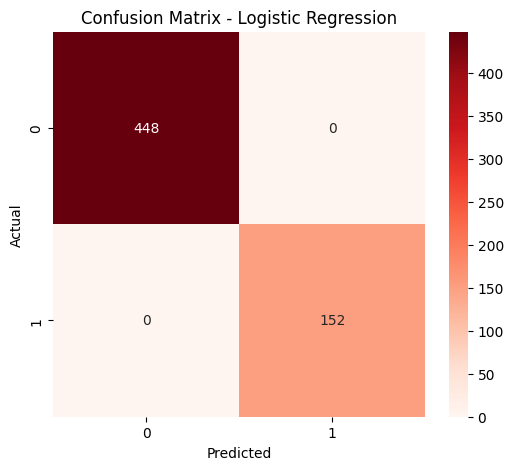

                        Coeficiente
Temperature               -0.021327
Humidity                   0.045995
WindSpeed                 -0.055699
WeatherCondition_Rainy     7.914860
WeatherCondition_Snowy    -1.329699
WeatherCondition_Sunny    -1.399845


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '/content/weather_dataU2.csv'  # Ruta al archivo
data = pd.read_csv(file_path, sep=';')

# Verificar el dataset
print(data.head())
print(data.info())
print(data.describe())

# Convertir la variable categórica 'WeatherCondition' a numérico
data = pd.get_dummies(data, columns=['WeatherCondition'], drop_first=True)

# Seleccionar características y variable objetivo
X = data[['Temperature', 'Humidity', 'WindSpeed'] + [col for col in data.columns if 'WeatherCondition_' in col]]
y = data['Predic']

# Escalar características numéricas
scaler = StandardScaler()
X.loc[:, ['Temperature', 'Humidity', 'WindSpeed']] = scaler.fit_transform(X[['Temperature', 'Humidity', 'WindSpeed']])

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Hacer predicciones
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
accuracy = logreg.score(X_test, y_test)
print(classification_report(y_test, y_pred))


print(f"Precisión del modelo: {accuracy * 100:.2f}%")
# Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Coeficientes del modelo
coef = pd.DataFrame(logreg.coef_[0], index=X.columns, columns=['Coeficiente'])
print(coef)


